# Proyecto 03 - Series de Tiempo Santiago Venegas Zarate

# Link para descarga del notebook 

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

el dataset para verificación se puede descargar de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). vamos a trabajar con los datos de  - los años 2017, 2018 y 2019.**

### Exploración de datos

Para el análisis exploratorio de Datos. vamos a resamplear los datos en varias ventanas de tiempo.

La pregunta que vamos a responder con este dataset es si la estrategia de la AUSA de reducir el pago en efectivo y hacer que las personas se pasen a métodos electrónico de pago esta siendo efectivo

#### Componentes de la serie

Vamos a identificar los componentes de la serie estacional 

### Predicción a Futuro

Para la predicción del futuro vamos a tratar de predecir la cantidad de autos que pasan por el peaje de ilia para pago en efectivo   




# Instalamos pystan y prophet 

In [ ]:

!pip install pystan
!pip install fbprophet

In [ ]:
!pip install pystan==2.19.1.1

!pip install prophet

     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 214 kB 35.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640199 sha256=a7dabef9d253a053625365b47129b9f6a5590ce3f9f624116cdccec47a97c2b3
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


# Instalamos statsmodels

In [ ]:
pip install statsmodels


# Importamos las librerias que vamos a usar 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()
%matplotlib inline
import statsmodels.api as sm
from fbprophet import Prophet
from prophet import Prophet
import warnings
import itertools
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# - Preparacion del datset

In [ ]:
data_2020 = pd.read_csv('/content/drive/MyDrive/proyecto 3/flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('/content/drive/MyDrive/proyecto 3/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/proyecto 3/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/proyecto 3/flujo-vehicular-2017.csv', sep =',')


In [ ]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [ ]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [ ]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [ ]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


# Que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [ ]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [ ]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [ ]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


# - Antes de entrar en la información de este dataset nos detendremos un momento a analizar de dónde vienen estos datos? cuál es su propósito?, los utilidad de generar estadísticas desde el nivel gubernamental responde a varios motivos que son la necesidad  de cuantificar el transito en el sistema de carreteras con lo que podemos generar  estimaciones del recaudo en cuanto a los peajes por otro lado podemos estimar el desgaste de la carretera hacer una medición de la contaminación con base en los  lugares en que se concentran los embotellamientos entre otros

##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dataset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

# Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**






# - Para poder identificar mejor cualquier tendencia vamos a armar 3 datasets para poder resamplear los datos de los peajes de Ilia , Retiro , Avellaneda y asi poder comparar entro estos 

# Ilia

In [ ]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


# Retiro

In [ ]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset2 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset2.estacion=='Retiro', dataset2.forma_pago == 'EFECTIVO')
dataset2 = dataset2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset2.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset2.head()


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
97,2019-01-01,2,Martes,Provincia,Liviano,10
167,2019-01-01,3,Martes,Provincia,Liviano,18
170,2019-01-01,3,Martes,Provincia,Pesado,1
237,2019-01-01,4,Martes,Provincia,Liviano,12
300,2019-01-01,5,Martes,Provincia,Liviano,5


# Avellaneda

In [ ]:

#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset3 = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset3.estacion=='Avellaneda', dataset3.forma_pago == 'EFECTIVO')
dataset3 = dataset3[mask]

#Quitamos las columnas que no vamos a utilizar
dataset3.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset3.head()


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
4,2019-01-01,1,Martes,Centro,Liviano,16
9,2019-01-01,1,Martes,Provincia,Liviano,12
42,2019-01-01,2,Martes,Centro,Liviano,1327
48,2019-01-01,2,Martes,Centro,Pesado,6
52,2019-01-01,2,Martes,Provincia,Liviano,1059


# - Pasamos la columna fecha a formato datetime, y le unimos la hora fin como hora

# - Quitamos las columnas fecha y hora fin ya que las incluimos en el campo fecha2

# para los 3 datasets


In [ ]:
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [ ]:
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')

dataset2.drop(columns=['fecha','hora_fin'], inplace = True)

dataset2.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
97,Martes,Provincia,Liviano,10,2019-01-01 02:00:00
167,Martes,Provincia,Liviano,18,2019-01-01 03:00:00
170,Martes,Provincia,Pesado,1,2019-01-01 03:00:00
237,Martes,Provincia,Liviano,12,2019-01-01 04:00:00
300,Martes,Provincia,Liviano,5,2019-01-01 05:00:00


In [ ]:
dataset3['fecha2'] = pd.to_datetime(dataset3.fecha) + pd.to_timedelta(dataset3.hora_fin, unit = 'h')

dataset3.drop(columns=['fecha','hora_fin'], inplace = True)

dataset3.head()


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
4,Martes,Centro,Liviano,16,2019-01-01 01:00:00
9,Martes,Provincia,Liviano,12,2019-01-01 01:00:00
42,Martes,Centro,Liviano,1327,2019-01-01 02:00:00
48,Martes,Centro,Pesado,6,2019-01-01 02:00:00
52,Martes,Provincia,Liviano,1059,2019-01-01 02:00:00


# - Corregimos el nombre de fecha2 a fecha para todos 


In [ ]:
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [ ]:
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
97,Martes,Provincia,Liviano,10,2019-01-01 02:00:00
167,Martes,Provincia,Liviano,18,2019-01-01 03:00:00
170,Martes,Provincia,Pesado,1,2019-01-01 03:00:00
237,Martes,Provincia,Liviano,12,2019-01-01 04:00:00
300,Martes,Provincia,Liviano,5,2019-01-01 05:00:00


In [ ]:
dataset3.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset3.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
4,Martes,Centro,Liviano,16,2019-01-01 01:00:00
9,Martes,Provincia,Liviano,12,2019-01-01 01:00:00
42,Martes,Centro,Liviano,1327,2019-01-01 02:00:00
48,Martes,Centro,Pesado,6,2019-01-01 02:00:00
52,Martes,Provincia,Liviano,1059,2019-01-01 02:00:00


# Reordenamos el dataset por fecha en los 3 

In [ ]:

dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


In [ ]:
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Liviano,1,2017-01-01
1,Domingo,Provincia,Pesado,1,2017-01-01
2,Domingo,Provincia,Pesado,11,2017-01-01
3,Domingo,Provincia,Pesado,4,2017-01-01
4,Domingo,Provincia,Pesado,20,2017-01-01


In [ ]:
dataset3.sort_values('fecha', inplace = True)
dataset3.reset_index(drop=True, inplace = True)
dataset3.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,39,2017-01-01
1,Domingo,Centro,Pesado,9,2017-01-01
2,Domingo,Centro,Pesado,8,2017-01-01
3,Domingo,Provincia,Pesado,7,2017-01-01
4,Domingo,Provincia,Pesado,13,2017-01-01


In [ ]:
dataset.tail()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00
238868,Martes,Provincia,Liviano,190,2019-12-31 23:00:00


In [ ]:
dataset2.tail()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
117310,Martes,Provincia,Liviano,26,2019-12-31 20:00:00
117311,Martes,Provincia,Liviano,34,2019-12-31 21:00:00
117312,Martes,Provincia,Pesado,1,2019-12-31 21:00:00
117313,Martes,Provincia,Liviano,20,2019-12-31 22:00:00
117314,Martes,Provincia,Liviano,5,2019-12-31 23:00:00


In [ ]:
dataset3.tail()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
284292,Martes,Centro,Liviano,1420,2019-12-31 22:00:00
284293,Martes,Provincia,Liviano,478,2019-12-31 23:00:00
284294,Martes,Centro,Pesado,4,2019-12-31 23:00:00
284295,Martes,Centro,Liviano,461,2019-12-31 23:00:00
284296,Martes,Provincia,Pesado,6,2019-12-31 23:00:00


# -Ya tenemos los datasets de los peajes de 'Illia','Avellaneda','Retiro’ Vamos a graficar los 3 datasets ver las tendencias de cada peaje.

# Cantidad de autos, por hora





# Illia 

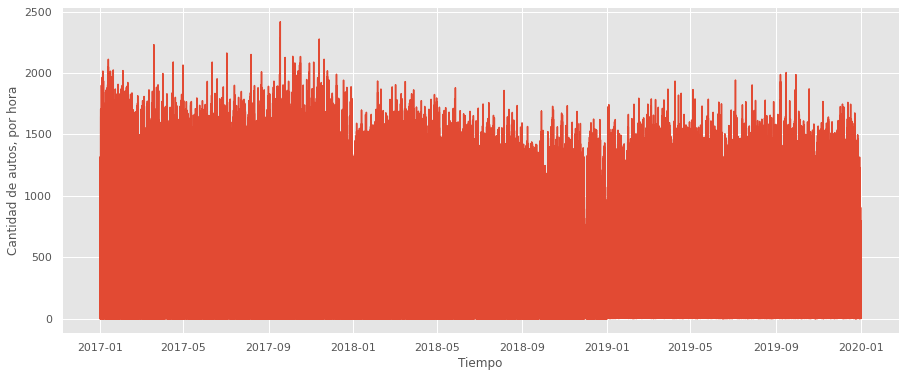

In [ ]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

# Retiro 

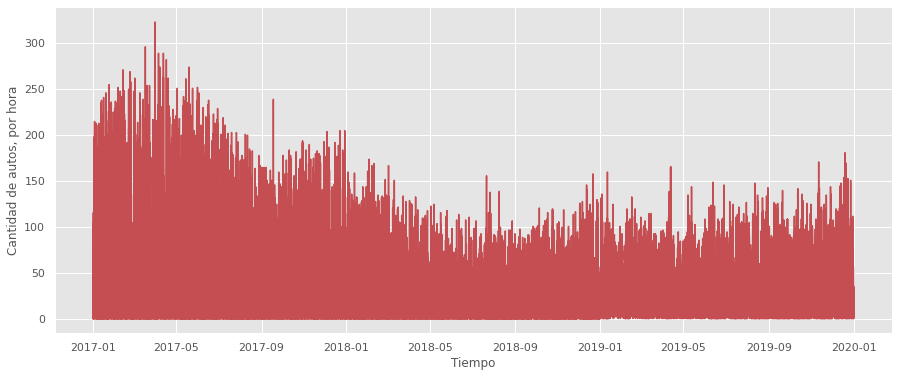

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(dataset2.fecha, dataset2.cantidad_pasos, color='r')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

# Avellaneda 

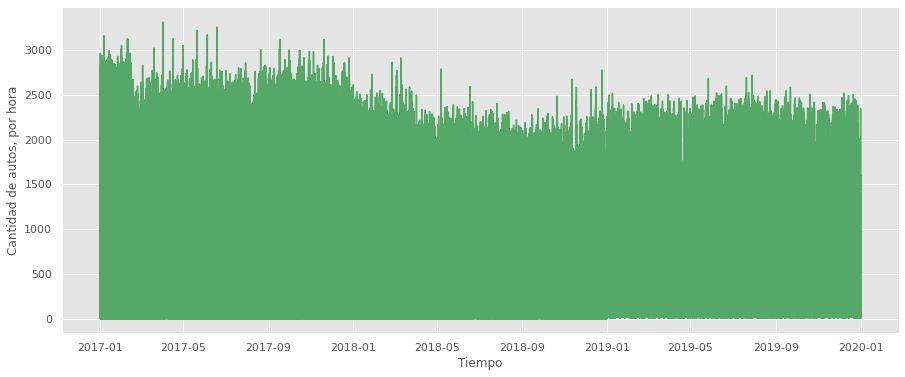

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(dataset3.fecha, dataset3.cantidad_pasos, color='g')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

# -Estas visualizaciones no son tan amigables debido a que esta sampleado por horas así que vamos a resamplear los datos en frecuencias de hora, día ,semana, mes y año para poder visualizar la tendencia de los datos en los 3 años de análisis en estos 3 peajes.

# Illia 

In [ ]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [ ]:
diario.tail()

,cantidad_pasos
fecha,
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259
2019-12-30,34523
2019-12-31,21447




# Cantidad de autos, por dia


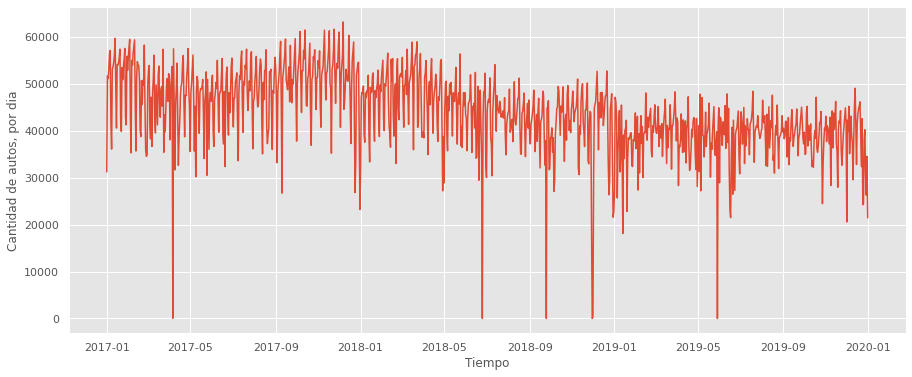

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [ ]:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


In [ ]:
semanal.tail()

,cantidad_pasos
fecha,
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881
2019-12-29,226390
2020-01-05,55970


## Cantidad de autos, por semana

Text(0, 0.5, 'Cantidad de autos, por semana')

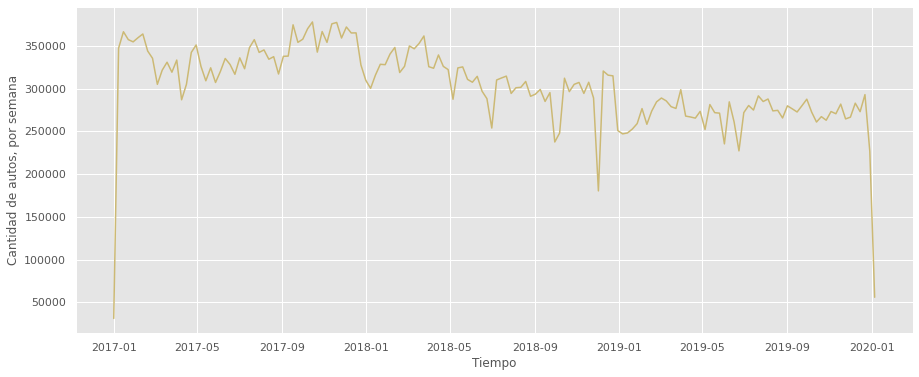

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos,color='y')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')


In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


In [ ]:
mensual.tail()

,cantidad_pasos
fecha,
2019-08-31,1223990
2019-09-30,1194001
2019-10-31,1177647
2019-11-30,1184560
2019-12-31,1151645


## Cantidad de autos, por mes

Text(0, 0.5, 'Cantidad de autos, por mes')

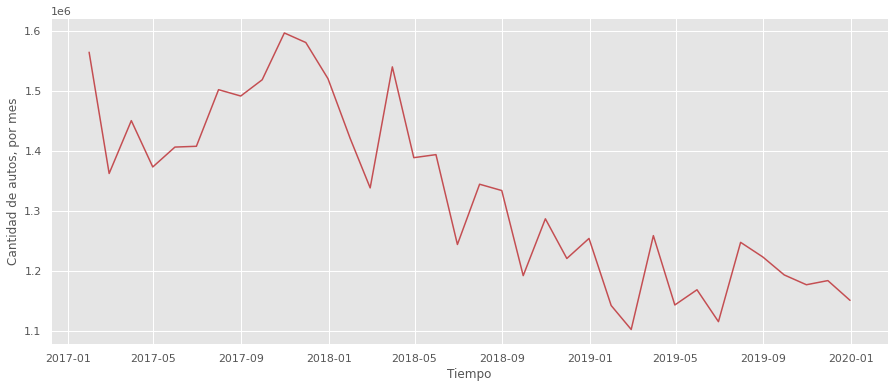

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos,color='r')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')


In [ ]:
anual = dataset.resample('Y', on = 'fecha').sum()
print(anual.shape)
anual.head()

(3, 1)


,cantidad_pasos
fecha,
2017-12-31,17783512
2018-12-31,15966944
2019-12-31,14115125


## Cantidad de autos, por año


Text(0, 0.5, 'Cantidad de autos, por año')

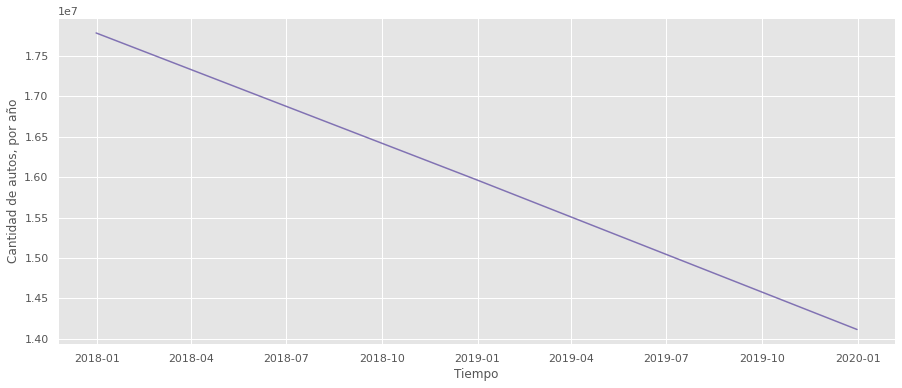

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(anual.index, anual.cantidad_pasos,color='m')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por año')

# - A través de estas visualizaciones podemos deducir que la tendencia a través de los 3 años en el peaje Illia el flujo vehicular que paga en efectivo en este peaje así mismo vemos que los picos del paso vehicular obedecen a temporadas de vacaciones de mitad y final de año siendo esta la temporada con mayor tránsito por cada año. sin embargo, no podemos aseverar con certeza que el plan de la usa de migrar el pago a métodos electrónicos hasta no ver los otros peajes.

# Retiro



In [ ]:

diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,1684
2017-01-02,4448
2017-01-03,4610
2017-01-04,4751
2017-01-05,4982


In [ ]:
diario2.tail()

,cantidad_pasos
fecha,
2019-12-27,1540
2019-12-28,745
2019-12-29,536
2019-12-30,1098
2019-12-31,553


## Cantidad de autos, por dia





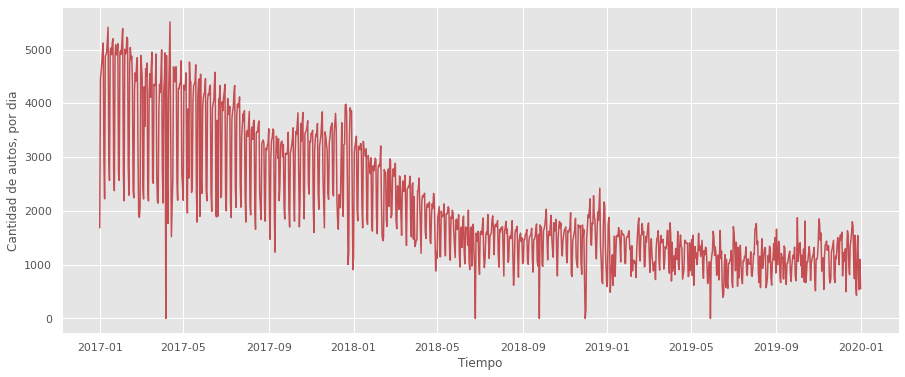

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos,color='r')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [ ]:
semanal2 = dataset2.resample('W', on = 'fecha').sum()
print(semanal2.shape)
semanal2.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,1684
2017-01-08,29062
2017-01-15,30890
2017-01-22,30353
2017-01-29,30228


In [ ]:
semanal2.tail()

,cantidad_pasos
fecha,
2019-12-08,8768
2019-12-15,8035
2019-12-22,9751
2019-12-29,6681
2020-01-05,1651


## Cantidad de autos, por semana


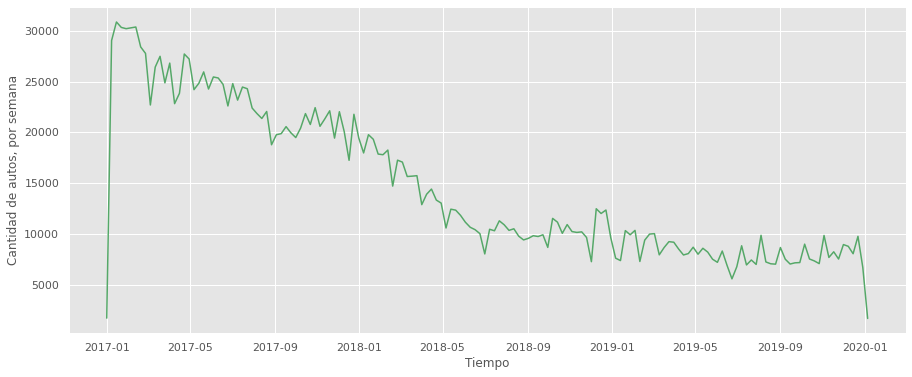

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(semanal2.index, semanal2.cantidad_pasos,color='g')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [ ]:
mensual2 = dataset2.resample('M', on = 'fecha').sum()
print(mensual2.shape)
mensual2.head()


(36, 1)


,cantidad_pasos
fecha,
2017-01-31,132148
2017-02-28,110947
2017-03-31,119502
2017-04-30,106559
2017-05-31,111502


In [ ]:
mensual2.tail()

,cantidad_pasos
fecha,
2019-08-31,34758
2019-09-30,31536
2019-10-31,34591
2019-11-30,35931
2019-12-31,36377


## Cantidad de autos, por mes


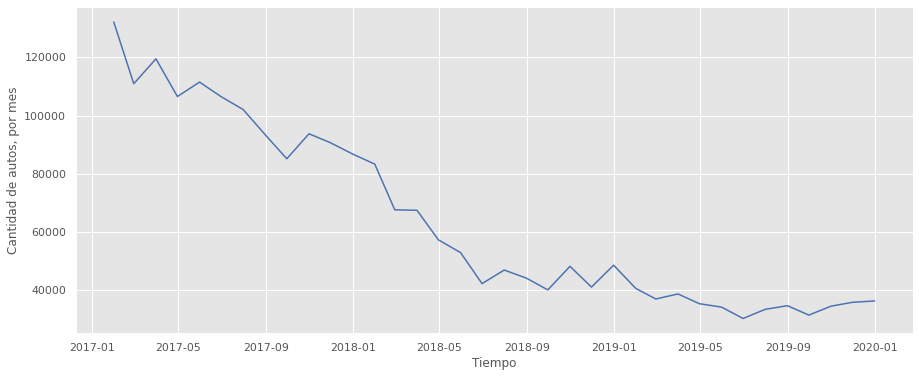

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(mensual2.index, mensual2.cantidad_pasos,color='b')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

In [ ]:
anual2 = dataset2.resample('Y', on = 'fecha').sum()
print(anual2.shape)
anual2.head()

(3, 1)


,cantidad_pasos
fecha,
2017-12-31,1239147
2018-12-31,640675
2019-12-31,423299


In [ ]:
anual2.tail()

,cantidad_pasos
fecha,
2017-12-31,1239147
2018-12-31,640675
2019-12-31,423299


## Cantidad de autos, por año


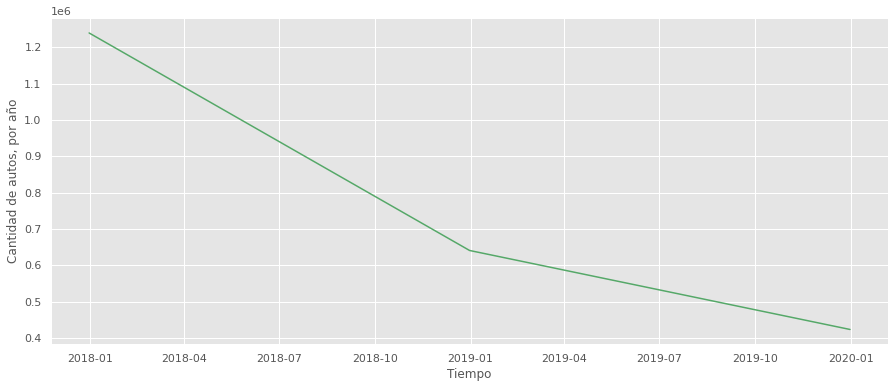

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(anual2.index, anual2.cantidad_pasos,color='g')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por año')
plt.show()

# - Ya en este peaje podemos identificar en los resampleos que la tendencia decreciente no es solo para el peaje de Ilia sino también ha disminuido la cantidad de automóviles que pagan en efectivo en el peaje de retiro 

# Avellaneda

In [ ]:
diario3 = dataset3.resample('D', on = 'fecha').sum()
print(diario3.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [ ]:
diario3.tail()

,cantidad_pasos
fecha,
2019-12-27,68340
2019-12-28,56707
2019-12-29,45581
2019-12-30,54693
2019-12-31,45682


# Cantidad de autos, por dia 

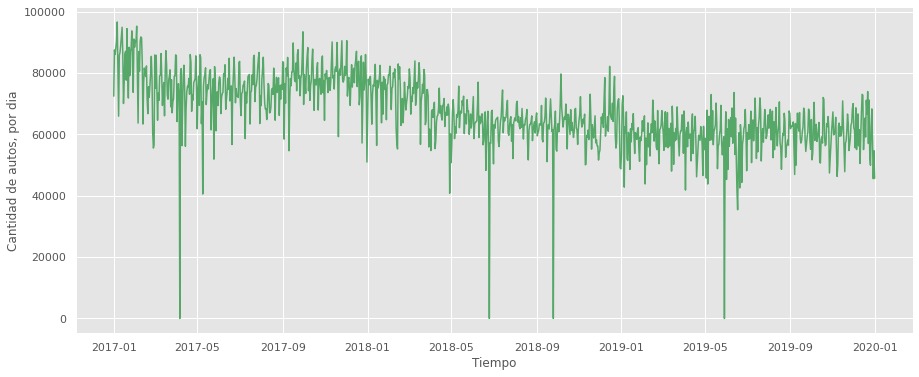

In [ ]:

plt.figure(figsize = (15,6))
plt.plot(diario3.index, diario3.cantidad_pasos,color='g')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [ ]:

semanal3 = dataset3.resample('W', on = 'fecha').sum()
print(semanal3 .shape)
semanal3.head()  

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,72504
2017-01-08,596452
2017-01-15,605170
2017-01-22,575405
2017-01-29,592733


In [ ]:
semanal3.tail()

,cantidad_pasos
fecha,
2019-12-08,424340
2019-12-15,439689
2019-12-22,454618
2019-12-29,406564
2020-01-05,100375


# Cantidad de autos, por semana

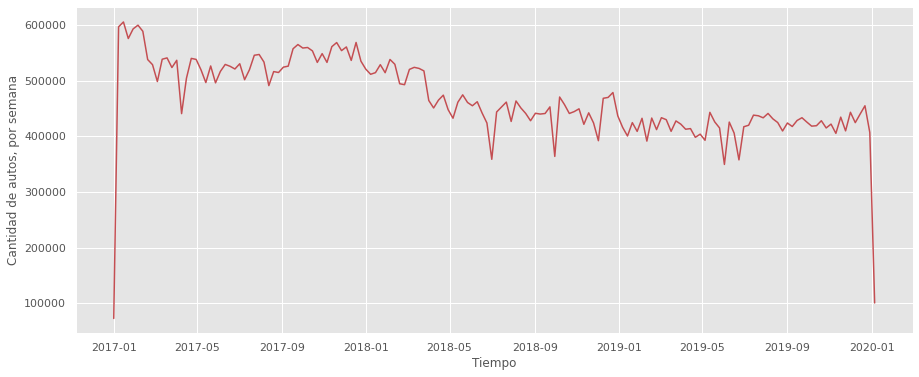

In [ ]:

plt.figure(figsize = (15,6))
plt.plot(semanal3.index, semanal3.cantidad_pasos,color='r')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [ ]:
mensual3 = dataset3.resample('M', on = 'fecha').sum()
print(mensual3.shape)
mensual3.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,2621827
2017-02-28,2186600
2017-03-31,2374450
2017-04-30,2172089
2017-05-31,2253303


In [ ]:
mensual3.tail()

,cantidad_pasos
fecha,
2019-08-31,1879014
2019-09-30,1821148
2019-10-31,1858502
2019-11-30,1816924
2019-12-31,1887767


# Cantidad de autos, por mes

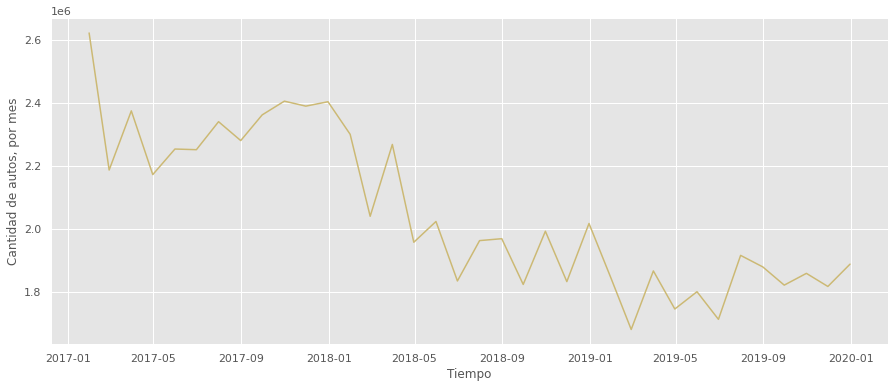

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(mensual3.index, mensual3.cantidad_pasos,color='y')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

In [ ]:
anual3 = dataset3.resample('Y', on = 'fecha').sum()
print(anual3.shape)
anual3.head()

(3, 1)


,cantidad_pasos
fecha,
2017-12-31,28039666
2018-12-31,24018452
2019-12-31,21825364


In [ ]:
anual3.tail()

,cantidad_pasos
fecha,
2017-12-31,28039666
2018-12-31,24018452
2019-12-31,21825364


# Cantidad de autos, por año

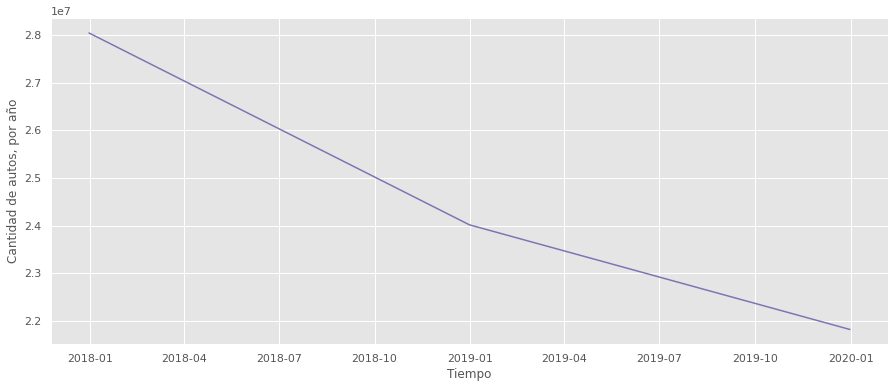

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(anual3.index, anual3.cantidad_pasos,color='m')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por año')
plt.show()

# - Con esta última visualización identificamos la tendencia decreciente del pago en efectivo en los 3 peajes lo que nos permite preguntarnos si los planes de cambio de los metodos de pago de la AUSA esta siendo efectivo ya que la reduccion de estos puede no obedece solamente a la implementacion de autopistas sin barreras sino por ejemplo el fomento del uso del transporte publico y medios alternativos de transporte. 

# - para más información consultar el siguiente enlace https://www.ausa.com.ar/preguntas-frecuentes/


# - Ahora bien, antes de obtener los datos estadísticos de nuestros dataset vamos a calcular la granularidad de estos y como hemos identificado que los 3 peajes tienen una tendencia parecida vamos a calcular la granularidad solo para Ilia.

## Diario

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')

In [ ]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

In [ ]:
result.seasonal

fecha
2017-01-01   -6773.858616
2017-01-02   -1139.059538
2017-01-03      87.580093
2017-01-04    1914.998893
2017-01-05    3051.834973
                 ...     
2019-12-27    5279.642666
2019-12-28   -2421.138470
2019-12-29   -6773.858616
2019-12-30   -1139.059538
2019-12-31      87.580093
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

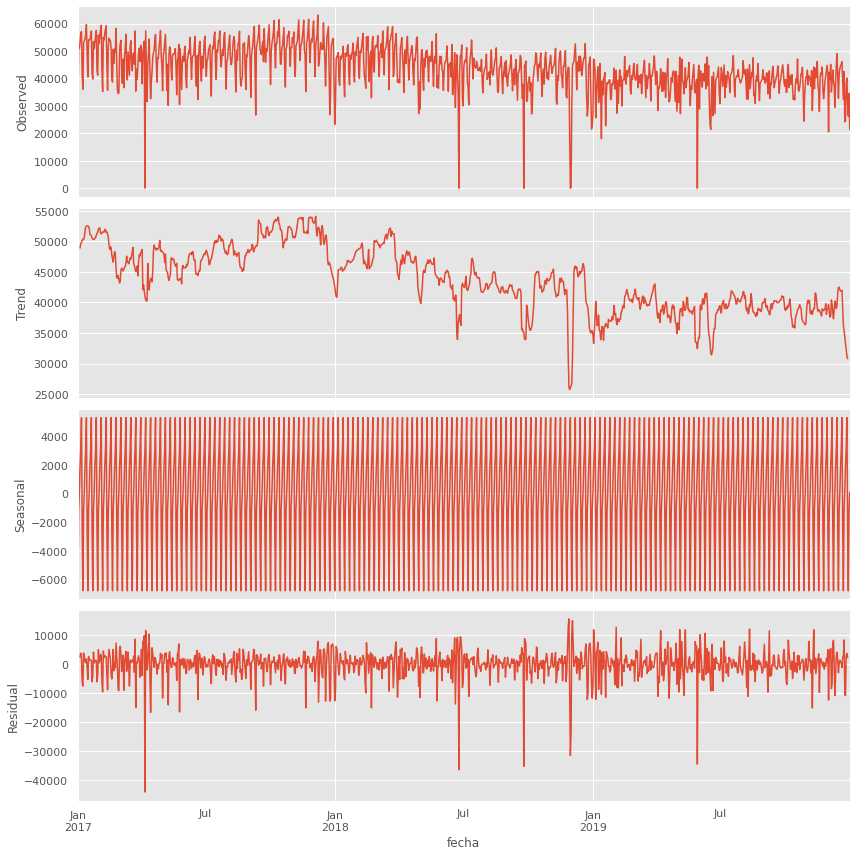

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

## Semanal

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result2 = seasonal_decompose(semanal.cantidad_pasos, model='additive')

In [ ]:
result2.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

In [ ]:
result2.seasonal

fecha
2017-01-01   -29066.512790
2017-01-08   -35210.426251
2017-01-15   -26342.632982
2017-01-22   -17116.580097
2017-01-29   -13559.546444
                  ...     
2019-12-08    31334.477595
2019-12-15    29519.290095
2019-12-22    11135.703556
2019-12-29   -29066.512790
2020-01-05   -35210.426251
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

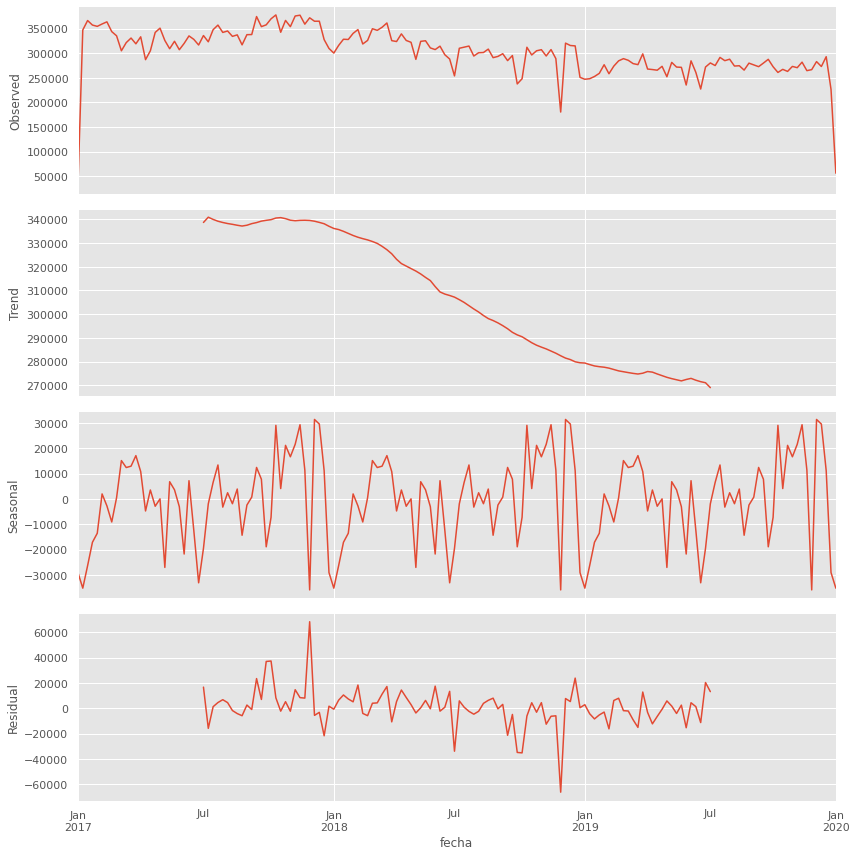

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result2.plot()
plt.show()

# Mensual

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result3 = seasonal_decompose(mensual.cantidad_pasos, model='additive')

In [ ]:
result3.trend

fecha
2017-01-31             NaN
2017-02-28             NaN
2017-03-31             NaN
2017-04-30             NaN
2017-05-31             NaN
2017-06-30             NaN
2017-07-31    1.475976e+06
2017-08-31    1.468992e+06
2017-09-30    1.471725e+06
2017-10-31    1.476105e+06
2017-11-30    1.476225e+06
2017-12-31    1.468880e+06
2018-01-31    1.455493e+06
2018-02-28    1.442362e+06
2018-03-31    1.422194e+06
2018-04-30    1.395682e+06
2018-05-31    1.367774e+06
2018-06-30    1.341676e+06
2018-07-31    1.318968e+06
2018-08-31    1.297525e+06
2018-09-30    1.275970e+06
2018-10-31    1.254018e+06
2018-11-30    1.234401e+06
2018-12-31    1.219655e+06
2019-01-31    1.210257e+06
2019-02-28    1.201607e+06
2019-03-31    1.197043e+06
2019-04-30    1.192511e+06
2019-05-31    1.186395e+06
2019-06-30    1.180560e+06
2019-07-31             NaN
2019-08-31             NaN
2019-09-30             NaN
2019-10-31             NaN
2019-11-30             NaN
2019-12-31             NaN
Freq: M, Name: cantida

In [ ]:
result3.seasonal

fecha
2017-01-31    -54040.015625
2017-02-28   -104408.640625
2017-03-31     87053.859375
2017-04-30    -30910.578125
2017-05-31      1315.942708
2017-06-30    -84185.390625
2017-07-31     23037.838542
2017-08-31     26695.671875
2017-09-30    -21281.098958
2017-10-31     73896.817708
2017-11-30     42593.109375
2017-12-31     40232.484375
2018-01-31    -54040.015625
2018-02-28   -104408.640625
2018-03-31     87053.859375
2018-04-30    -30910.578125
2018-05-31      1315.942708
2018-06-30    -84185.390625
2018-07-31     23037.838542
2018-08-31     26695.671875
2018-09-30    -21281.098958
2018-10-31     73896.817708
2018-11-30     42593.109375
2018-12-31     40232.484375
2019-01-31    -54040.015625
2019-02-28   -104408.640625
2019-03-31     87053.859375
2019-04-30    -30910.578125
2019-05-31      1315.942708
2019-06-30    -84185.390625
2019-07-31     23037.838542
2019-08-31     26695.671875
2019-09-30    -21281.098958
2019-10-31     73896.817708
2019-11-30     42593.109375
2019-12-31    

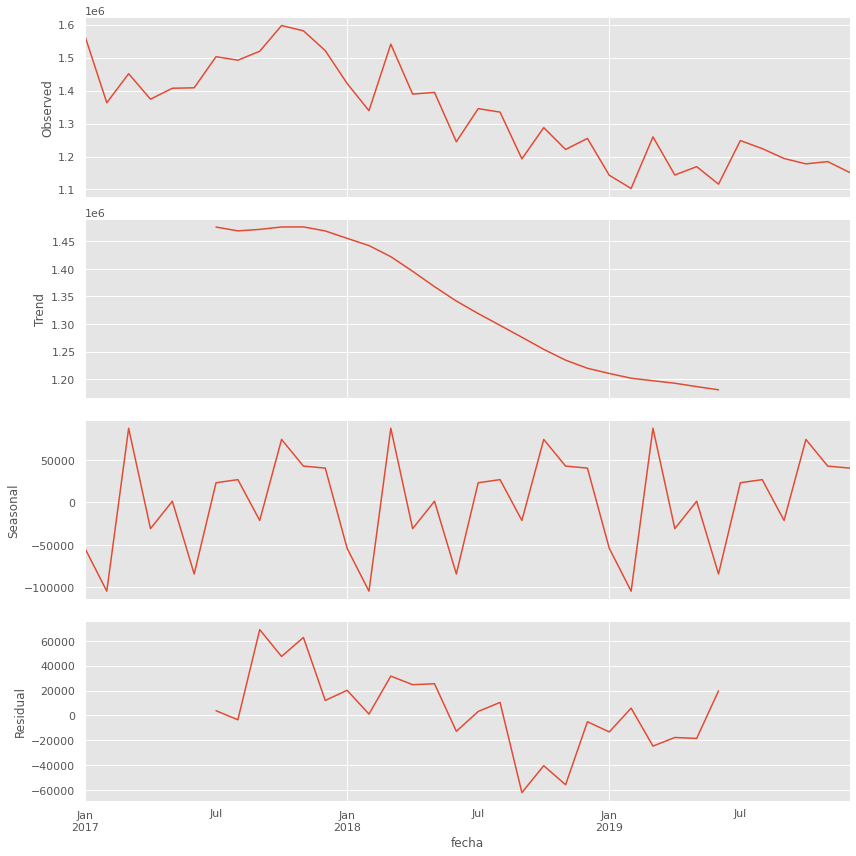

In [ ]:

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result3.plot()
plt.show()

# - Observando el componente estacional de cada una de las ventanas de tiempo podemos concluir que semanal es el rango más apropiado ya que si apreciamos las otras ventanas de tiempo en el error se puede identificar tendencias y este debe ser totalmente aleatorio así como se ve en las gráficas de semanal.

# - Ahora bien, ya que tenemos un dataset trabajable para modelos de series de tiempo es importante definir la métrica con sobre la cual vamos a medir el error y escogimos el RMSE el cual tiene la ventaja de no dar valores negativos ya que esta al cuadrado 

In [ ]:
semanal.shape

(158, 1)

In [ ]:
semanal.head()

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


In [ ]:
semanal.tail()

,cantidad_pasos
fecha,
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881
2019-12-29,226390
2020-01-05,55970


# - Contamos la cantidad de valores nulos 


In [ ]:
for col in semanal.columns:
  nulos= diario[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/155))

cantidad_pasos 0.00%


# - Obtenemos los datos estadísticos más importantes como la desviación estándar el promedio y los cuartiles

In [ ]:
semanal.describe()

,cantidad_pasos
count,158.000000
mean,302946.715190
std,47342.854449
min,31183.000000
25%,276345.250000
50%,307094.000000
75%,334921.500000
max,377832.000000


# - Vamos a calcular ahora el lookback de los datos para saber cuántas semanas necesito para predecir la siguiente

# Ilia

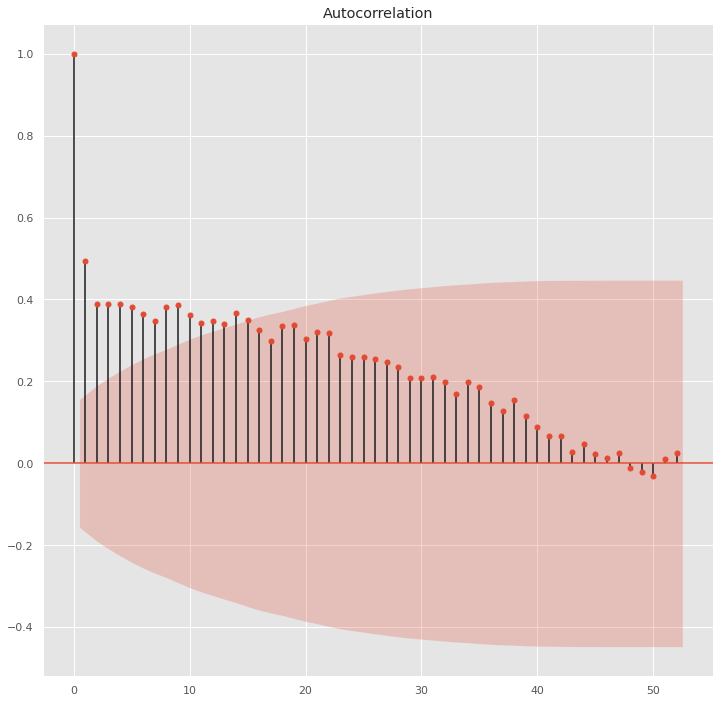

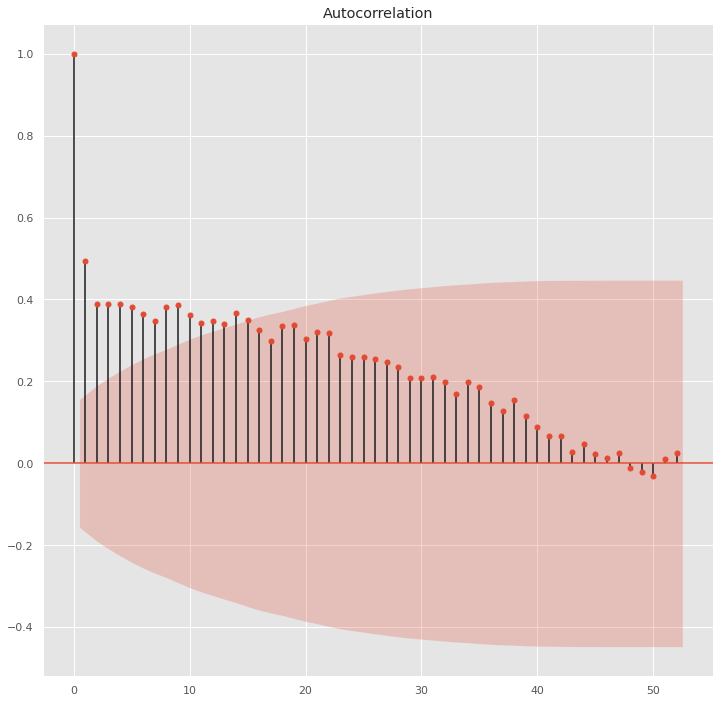

In [ ]:


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal.cantidad_pasos,lags=52)

# - Tenemos un lookback de 16 semanas que es la cantidad de datos necesaria para predecir la siguiente semana.




# - Después de haber analizado los datos para este dataset fue necesario hacer un resampling de manera semanal para poder trabajar con una granularidad adecuada de los mismo así mismo el dataset no presenta valores nulos por lo que podemos proceder a la construcción de los modelos

# - Otra pregunta que debemos hacernos antes de construir los modelos es con que información el algoritmo predice y para este caso los vamos a entrenar con los datos semanales de desde 2017-01-01 hasta el 2019-10-01 y vamos a usar para la predicción el último trimestre de 2019 que es el periodo que buscamos predecir 

# One-Step Prediction

In [ ]:
senial = semanal.cantidad_pasos

senial.head()

fecha
2017-01-01     31183
2017-01-08    347212
2017-01-15    366413
2017-01-22    357215
2017-01-29    354581
Freq: W-SUN, Name: cantidad_pasos, dtype: int64

In [ ]:
look_back = 16 #SEMANAS 


# - Vamos ahora a crear una matriz vacía con ceros y la vamos a llenar con el look back y con senial que es semanal filtrado por la cantidad de pasos

In [ ]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(141, 16) (141,)


In [ ]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

# - Separamos X e Y 




In [ ]:
print(X)

[[ 31183. 347212. 366413. ... 333297. 286862. 304912.]
 [347212. 366413. 357215. ... 286862. 304912. 342225.]
 [366413. 357215. 354581. ... 304912. 342225. 350946.]
 ...
 [265594. 279775. 276271. ... 264500. 266555. 282891.]
 [279775. 276271. 272592. ... 266555. 282891. 272960.]
 [276271. 272592. 279927. ... 282891. 272960. 292881.]]


In [ ]:
print(y)

[342225. 350946. 325875. 309072. 324240. 307054. 319937. 335147. 328122.
 316651. 335900. 323159. 347770. 357156. 342240. 345164. 334245. 337243.
 316987. 337659. 337933. 374520. 353999. 357671. 369918. 377832. 342571.
 366650. 353947. 375644. 377263. 359053. 371970. 364991. 365063. 327602.
 309692. 300242. 315780. 328359. 327887. 340275. 348044. 318733. 325966.
 349768. 346506. 352713. 361465. 325545. 323725. 339255. 325904. 322154.
 287470. 324115. 325304. 310709. 307369. 314291. 296834. 288154. 253807.
 310012. 312335. 314517. 294270. 300955. 301407. 308307. 290940. 293436.
 298932. 284913. 295210. 237507. 247986. 312089. 296381. 304897. 307134.
 294310. 307352. 288934. 180328. 320481. 315645. 314832. 250861. 246994.
 248077. 252617. 259019. 276568. 258204. 273664. 284439. 288919. 285547.
 278834. 276714. 298638. 267797. 266745. 265423. 273282. 252104. 281283.
 271796. 271232. 235301. 284432. 260940. 227123. 271865. 280160. 274852.
 291431. 284822. 287773. 273867. 274513. 265594. 27

# - Creamos nuestras variables de entrenamiento 

In [ ]:
N_train = 52*2 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]


print(X_test.shape, y_test.shape)

(88, 16) (88,)
(12, 16) (12,)


# - One step prediction

# - Vamos a entrenar un random forest para predicir la serie usando el valor anterior 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train,y_train)

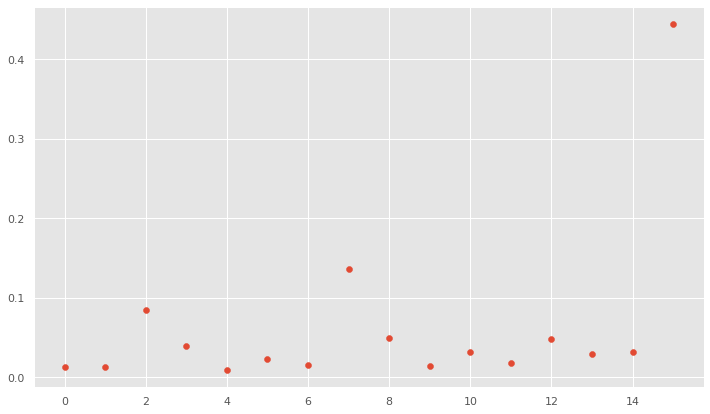

In [ ]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [ ]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# - Graficamos los resultados del modelo

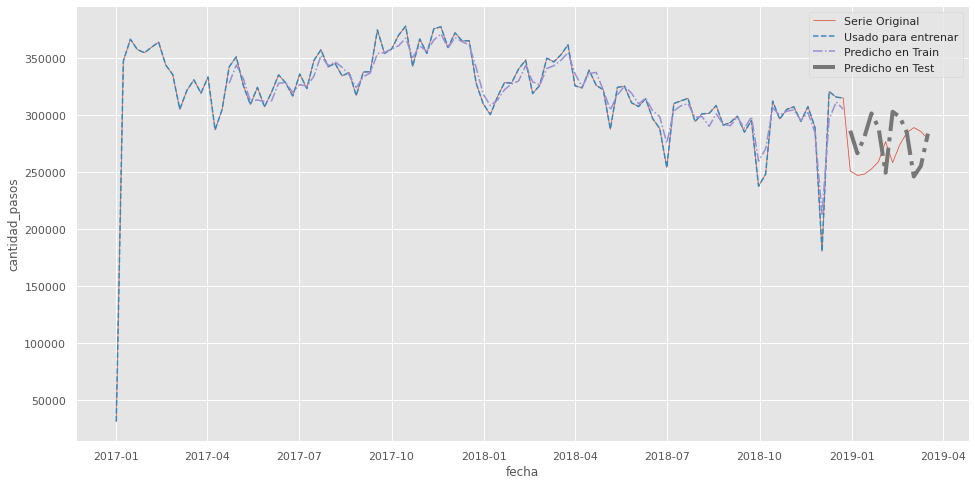

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('fecha')
plt.ylabel('cantidad_pasos')
plt.show()

In [ ]:
MSEb = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSEb))

MSEb = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSEb))

Error en Train: 8992.569834812679
Error en Test: 31715.383628990425


# - Vamos a tomar este modelo de one step prediction como nuestro modelo de benchmark

# - Multi-Step Prediction

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


ada_clf = AdaBoostRegressor(DecisionTreeRegressor())
ada_clf.fit(X_train, y_train)



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [ ]:
y_pred = ada_clf.predict(X)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

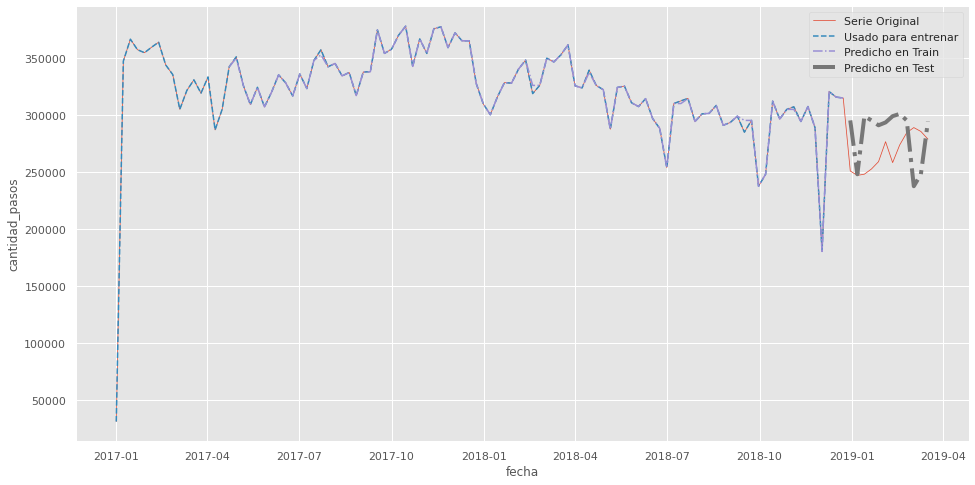

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('fecha')
plt.ylabel('cantidad_pasos')
plt.show()

In [ ]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1479.6499278852782
Error en Test: 34742.87019303385


# - Vamos ahora a optimizar los hiperparametros 

In [ ]:

param_dist = {
 'n_estimators': [50, 100,250,500,1000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

ada_clf = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ada_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
ada_clf.best_params_


{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 250}

In [ ]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=250,loss='exponential',learning_rate=0.01)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [ ]:
y_pred = ada_clf.predict(X)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

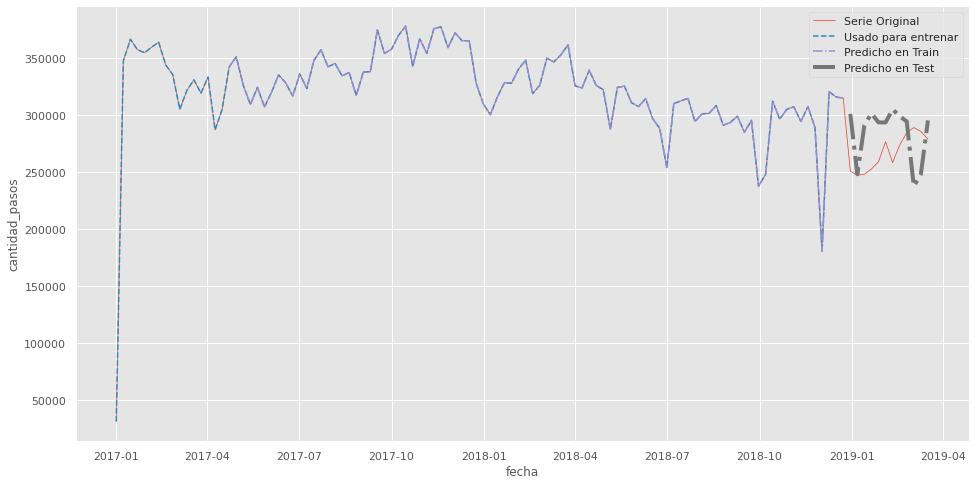

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('fecha')
plt.ylabel('cantidad_pasos')
plt.show()

In [ ]:
MSEm = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSEm))

Error en Test: 35864.901176730804


# - Vemos entonces que la optimización de hiperparametros en este modelo empeoro el resultado de 34742 a 35864 por lo que este modelo de multi-step no seria el mas idoneo para esta tarea 

# - Vamos ahora a construir un modelo ARIMA sigla en inglés  para modelo autorregresivo de media móvil

# - Elaboramos un loop que nos devuelva todas las posibles combinaciones de p,d,q 




In [ ]:
# definimos d y q para que tomen cualquier valor entre 0 y  1 
q = d = range(0, 2)
# definimos p para que tome cualquier valor entre o y 3 
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
train_data = semanal['2017-01-01':'2019-10-01']
test_data =  semanal['2019-10-06':'2019-12-22'] 

In [ ]:
train_data.shape

(144, 1)

In [ ]:
test_data.shape

(12, 1)

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        #try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

          
            prediction = results.get_forecast(steps=12)
            
            test_data["predicho"]  = prediction.predicted_mean['2019-10-06':'2019-12-22']
            MSE = mean_squared_error(test_data.predicho,test_data.cantidad_pasos)

            print('SARIMAX{}x{} - MSE:{}'.format(param, param_seasonal, MSE), end='\r')
            SARIMAX_model.append([param, param_seasonal, MSE])
        #except:
         #   continue

In [ ]:
df_model = pd.DataFrame(SARIMAX_model)
df_model.head()


,0,1,2
0,"(0, 0, 0)","(0, 0, 0, 12)",7.427626e+10
1,"(0, 0, 0)","(0, 0, 1, 12)",2.123146e+10
2,"(0, 0, 0)","(0, 1, 0, 12)",2.216036e+08
3,"(0, 0, 0)","(0, 1, 1, 12)",2.117612e+08
4,"(0, 0, 0)","(1, 0, 0, 12)",1.733329e+08


In [ ]:
df_model.sort_values(2)

,0,1,2
189,"(2, 1, 1)","(3, 0, 1, 12)",8.843094e+07
236,"(3, 1, 0)","(3, 0, 0, 12)",9.948945e+07
88,"(1, 0, 1)","(2, 0, 0, 12)",9.966264e+07
125,"(1, 1, 1)","(3, 0, 1, 12)",1.001351e+08
252,"(3, 1, 1)","(3, 0, 0, 12)",1.010744e+08
...,...,...,...
39,"(0, 1, 0)","(1, 1, 1, 12)",1.448024e+09
17,"(0, 0, 1)","(0, 0, 1, 12)",1.951933e+10
1,"(0, 0, 0)","(0, 0, 1, 12)",2.123146e+10
16,"(0, 0, 1)","(0, 0, 0, 12)",6.921964e+10


# - Despues de haber ordenado el dataframe de las combinaciones de pdq escogemos la combinacion 189 que es la mejor 

In [ ]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(2, 1, 1),
                                seasonal_order=(3, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

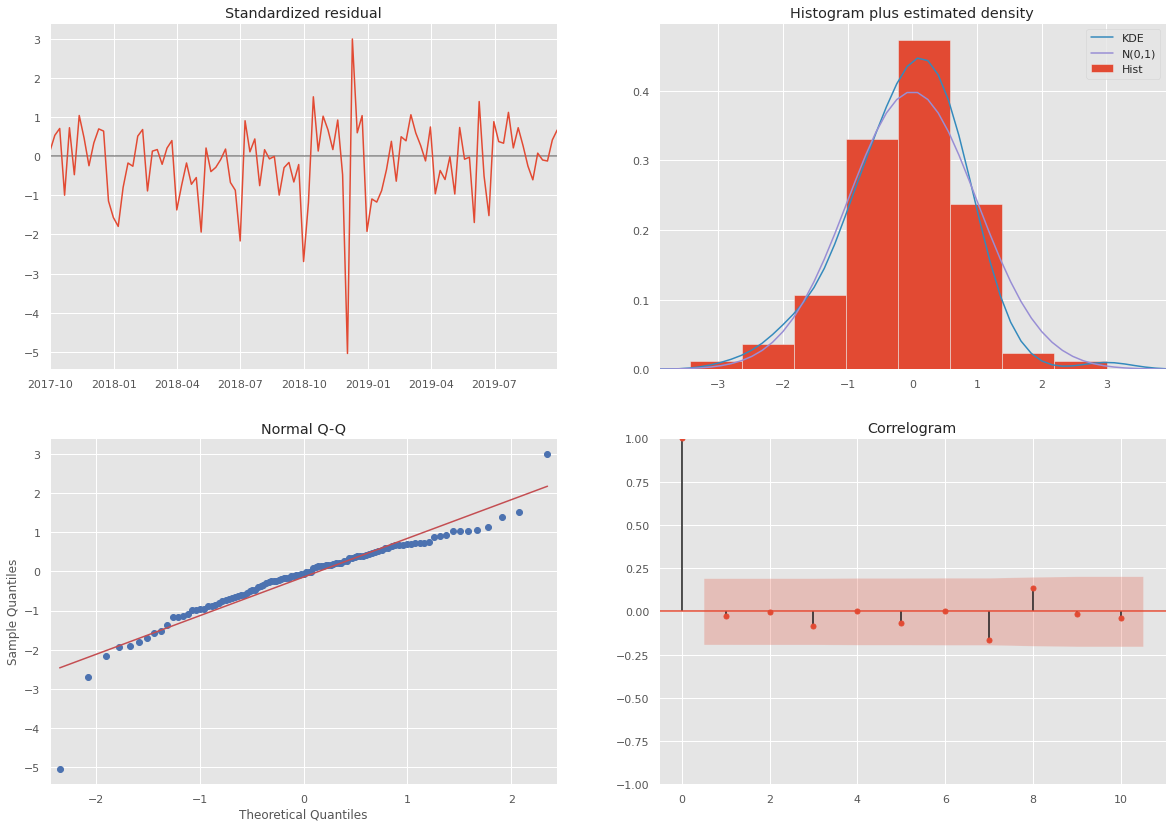

In [ ]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

# - Vemos entonces en la gráfica que la distribución del error es gaussiana y que el correlograma nos muestra que no tienen correlación las variables así, como el residual se muestra sin tendencia

In [ ]:
test_data.head()

,cantidad_pasos,predicho
fecha,,
2019-10-06,272483,308670.729012
2019-10-13,260840,282393.868971
2019-10-20,267147,290238.133003
2019-10-27,262950,287446.942515
2019-11-03,273129,292095.392117


In [ ]:
test_data.tail()

,cantidad_pasos,predicho
fecha,,
2019-11-24,264500,287721.286500
2019-12-01,266555,292628.241050
2019-12-08,282891,289034.150856
2019-12-15,272960,292641.077430
2019-12-22,292881,289428.784556


# -Vamos ahora a predecir los datos del test y a medir su error 

In [ ]:
pred2 = results.get_forecast(steps=12)
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-10-06':'2019-12-22'])

2019-10-06    276889.662582
2019-10-13    274663.723490
2019-10-20    270820.385792
2019-10-27    276627.554802
2019-11-03    286960.894162
2019-11-10    277111.021039
2019-11-17    276823.837448
2019-11-24    273007.576534
2019-12-01    276303.642671
2019-12-08    280200.205612
2019-12-15    278250.940682
2019-12-22    279161.536318
Freq: W-SUN, dtype: float64


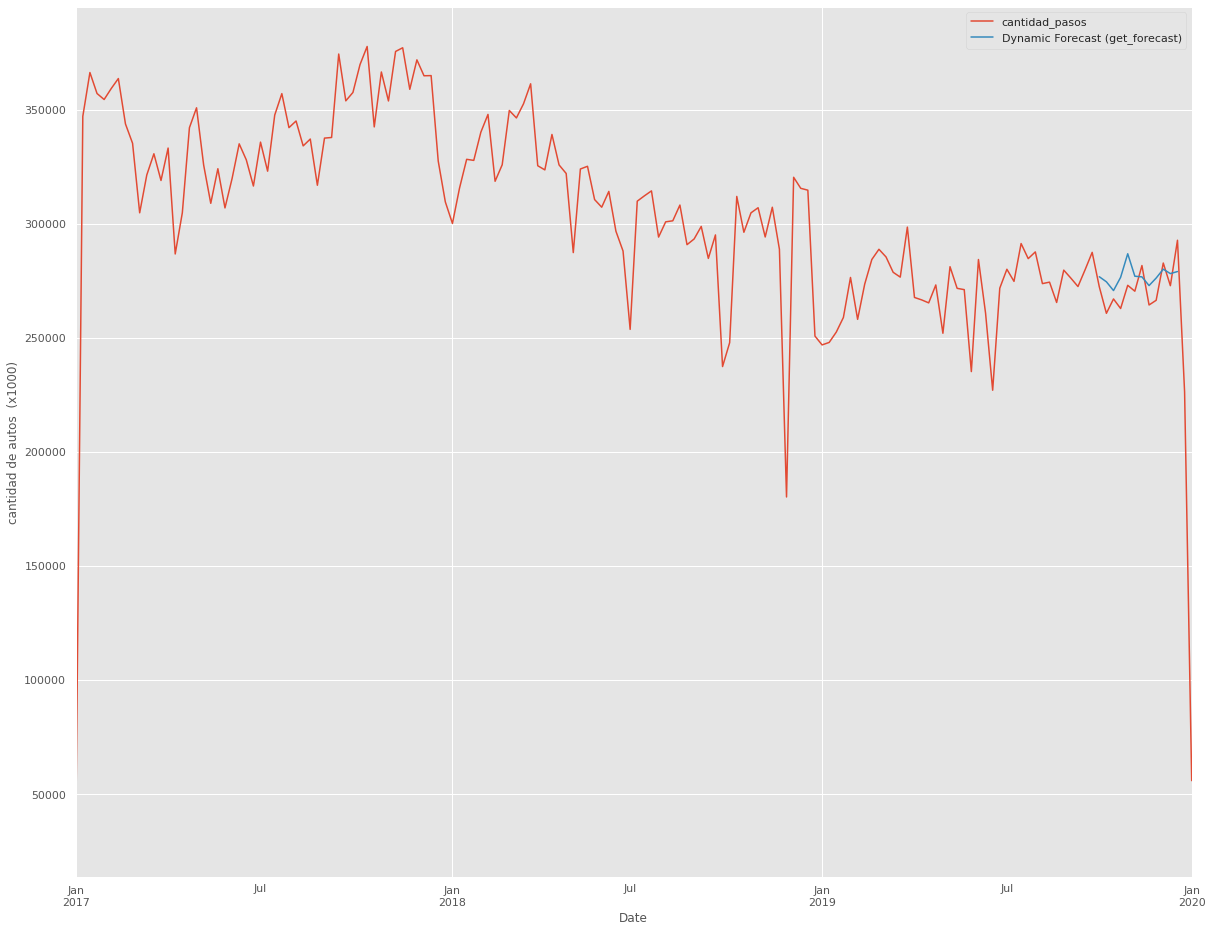

In [ ]:
ax = semanal.plot(figsize=(20, 16))
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
#ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('cantidad de autos  (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:


MSEa = mean_squared_error(test_data.predicho,test_data.cantidad_pasos)
print('MSE: {}', np.sqrt( MSEa))

MSE: {} 20994.481757446247


# - Hasta ahora este modelo ha sido el que mejor desempeño ha tenido con un error casi 33% mas bajo frente al modelo de benchmark y con una mejora del 42% frente al multistep prediction 



# -Por ultimo un modelo de prophet para esta serie primero vamos a transformar los datos de entrenamiento del modelo ya que los modelos de pophet solo reciben los datos en 2 columnasY y ds 

# -  Creamos nuestra variables de train y test para poder moldear los datos de la manera que los recibe prophet

In [ ]:

N_test = 12 #cantidad de puntos que vamos a usar para evaluar

senial_train = senial[:-N_test]


senial_test = senial[-N_test:]



print(senial_test.shape, senial_train.shape)

(12,) (146,)


In [ ]:
senial_train = senial_train.to_frame()

In [ ]:
senial_train

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-09-15,272592
2019-09-22,279927
2019-09-29,287568


In [ ]:
senial_train = senial_train.reset_index()
senial_train.rename(columns= {'fecha':'ds'}, inplace=True)
senial_train.rename(columns={'cantidad_pasos':'y'},inplace=True)
senial_train.head()

,ds,y
0,2017-01-01,31183
1,2017-01-08,347212
2,2017-01-15,366413
3,2017-01-22,357215
4,2017-01-29,354581


# - Ya teniendo nuestros datos en las columnas y e ds vamos a entrenar el modelo 

In [ ]:
senial_train

,ds,y
0,2017-01-01,31183
1,2017-01-08,347212
2,2017-01-15,366413
3,2017-01-22,357215
4,2017-01-29,354581
...,...,...
141,2019-09-15,272592
142,2019-09-22,279927
143,2019-09-29,287568
144,2019-10-06,272483


In [ ]:

m = Prophet(interval_width=0.95)
model = m.fit(senial_train) 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12,freq='W')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,328938.677597,213696.289014,330656.506551,328938.677597,328938.677597,-56209.046031,-56209.046031,-56209.046031,-56209.046031,-56209.046031,-56209.046031,0.0,0.0,0.0,272729.631566
1,2017-01-08,329207.946672,219506.830474,337318.442720,329207.946672,329207.946672,-49595.069491,-49595.069491,-49595.069491,-49595.069491,-49595.069491,-49595.069491,0.0,0.0,0.0,279612.877180
2,2017-01-15,329477.215746,251740.355494,365957.892454,329477.215746,329477.215746,-20291.111524,-20291.111524,-20291.111524,-20291.111524,-20291.111524,-20291.111524,0.0,0.0,0.0,309186.104222
3,2017-01-22,329746.484821,275419.545503,393400.817844,329746.484821,329746.484821,7453.214429,7453.214429,7453.214429,7453.214429,7453.214429,7453.214429,0.0,0.0,0.0,337199.699249
4,2017-01-29,330015.753895,287304.296897,403225.001957,330015.753895,330015.753895,16444.339056,16444.339056,16444.339056,16444.339056,16444.339056,16444.339056,0.0,0.0,0.0,346460.092950


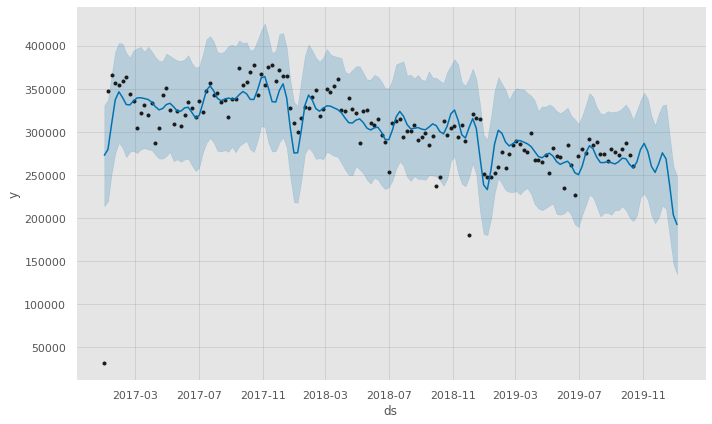

In [ ]:
plot1 = m.plot(forecast)


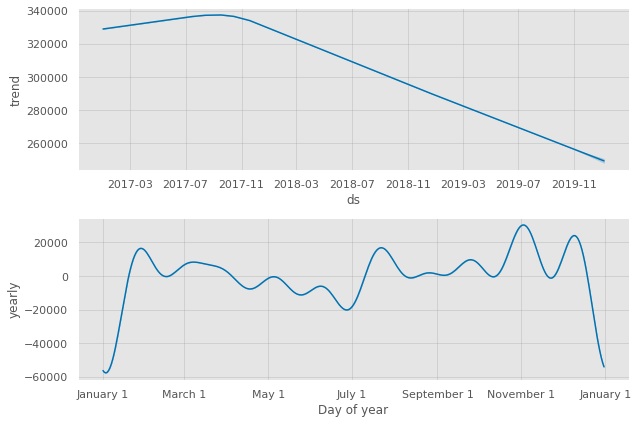

In [ ]:
plt2 = m.plot_components(forecast)


In [ ]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation


In [ ]:
df_cv = cross_validation( model = m, initial = pd.to_timedelta(105,unit="W"),period=pd.to_timedelta(1,unit="W"), horizon = pd.to_timedelta(12,unit="W"))


INFO:prophet:Making 29 forecasts with cutoffs between 2019-01-06 00:00:00 and 2019-07-21 00:00:00


  0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,14 days,5.732635e+08,23942.922633,19554.794693,0.072417,0.062176,0.072493,1.0
1,21 days,5.848219e+08,24183.091452,20067.540941,0.073689,0.070610,0.074359,1.0
2,28 days,5.077513e+08,22533.337952,19207.199298,0.070094,0.068738,0.071679,1.0
3,35 days,4.739427e+08,21770.224626,18541.521802,0.067704,0.066205,0.069767,1.0
4,42 days,4.560715e+08,21355.831012,18134.817779,0.065965,0.065902,0.068611,1.0


In [ ]:
df_p.describe()



,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,11,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,49 days 00:00:00,5.627378e+08,23669.319431,20424.085872,0.074407,0.075723,0.077150,1.0
std,23 days 05:11:34.673206946,7.905628e+07,1658.695492,1962.522081,0.006935,0.013731,0.007920,0.0
min,14 days 00:00:00,4.560715e+08,21355.831012,18134.817779,0.065965,0.054039,0.068611,1.0
25%,31 days 12:00:00,4.985467e+08,22327.207160,18898.292499,0.068899,0.066054,0.071131,1.0
50%,49 days 00:00:00,5.732635e+08,23942.922633,19788.606301,0.072417,0.070610,0.074359,1.0
75%,66 days 12:00:00,6.067843e+08,24628.955854,21961.427905,0.079713,0.086381,0.083578,1.0
max,84 days 00:00:00,6.972708e+08,26405.885079,23717.888383,0.086009,0.094167,0.090598,1.0


In [ ]:
MSEp = df_p.rmse.mean()
MSEp

23669.31943123413

# - Vamos ahora  a traer el RMSE de todos los modelos para efectos practicos lo hemos nombrado

# - RMSEb benchmark 
# - RMSEm Multi step
# - RMSEa ARIMA
# - RMSEP Prophet



In [ ]:

MSEb = np.sqrt(MSEb)
print('Error en Test:',(MSEb))



Error en Test: 31715.383628990425


In [ ]:

MSEm = np.sqrt(MSEm)
print('Error en Test:',(MSEm))


Error en Test: 35353.5902219751


In [ ]:

MSEa = np.sqrt( MSEa)
print('Error en Test:',(MSEa))

Error en Test: 20994.481757446247


In [ ]:
print('Error en Test',MSEp)

Error en Test 23669.31943123413


# - Ahora creamos un dataframe vacio y lo llenamos con los valores del RMSE de cada modelo para poder graficarlo 

In [ ]:
dfm = pd.DataFrame()

dfm['Onestep'] = [MSEb]
dfm['Multistep'] = [MSEm]
dfm['ARIMA'] = [MSEa]
dfm['Prophet'] = [MSEp]

In [ ]:
dfm.head()

,Onestep,Multistep,ARIMA,Prophet
0,31715.383629,35353.590222,20994.481757,23669.319431


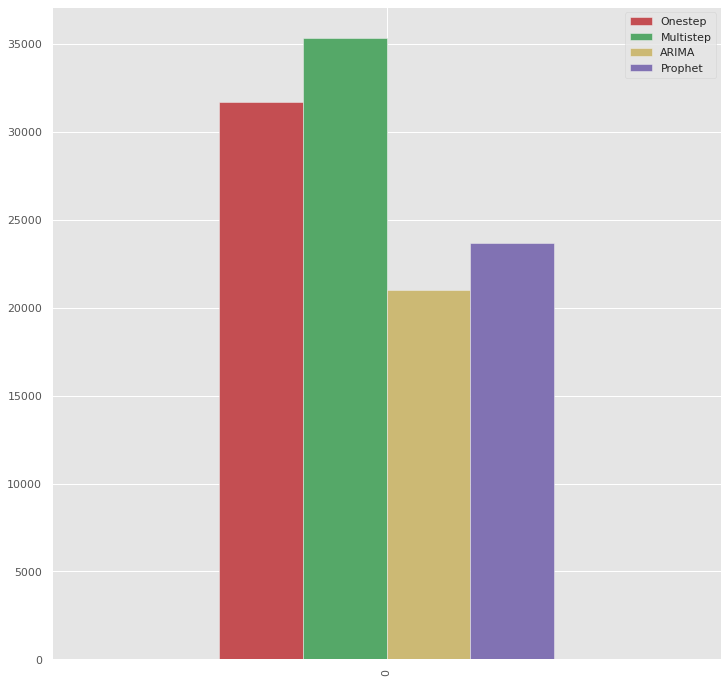

In [ ]:
dfm.plot(kind='bar',color='r''g''y''m')

# - Después de haber construido varios modelos y comparar entre estos podemos concluir que el mejor modelo es el modelo ARIMA tenido un rmse de 20990  seguido por el modelo de prophet con un rmse de 23669 y por último el modelo de multistep construido con un ADA boost con un error de 35353 tiendo este el peor desempeño ya que el modelo de benchmark tenia 31715 de rmse

# - A través de esta investigación podemos concluir con datos externos al dataset (investigación de la página de la AUSA consulta con personas locales de BA ) El plan de la AUSA para incentivar el uso del telepase en vez del efectivo esta siendo efectivo esta afirmación en base a las tendencias identificada en los sampleos anuales de los datos haciendo aquí una salvedad que es no es que transiten menos autos es que la cantidad de pagos en efectivo es menor

# - El incentivo del telepase como una política gubernamental alineada con la conservación del medio ambiente sin embargo no implementada a nivel nacional ya que en el otro lado del análisis este tipo de autopistas sin cobros pueden dejar sin trabajo al personal de las casetas de pago

# - En los 3 peajes aun siendo estos de paso obligado ya que quedan en camino a zonas más concurridas como microcentro en el caso de ilia que conecta con la autopista 9 julio sin embargo con el plan de autopistas sin casetas de cobro sino cobro automático con telepase o en su defecto con la lectura de las patentes del automóvil se ha logrado una disminución a través del tiempo del uso del efectivo esto también promovido por la medida de cobrar el doble de la tarifa por paso si se paga en efectivo 





# ¿Que me gustaria intentar?







# -Hacer un cruce entre la información en que lugares está habilitado el tele pase y el flujo de contratación de trabajadores de las casetas y definir si existe correlación entre una menor contratación por la implementación del tele pase.

# - Estuvimos intentando acceder a los datos de contratación de la AUSA  pero al parecer no son de acceso publico